In [1]:
from IPython.display import display, Image
from pprint import pprint
from itertools import chain

from sympy import Function, Symbol, symbols, ratsimp
import pyx

from ginv import *
sympy.init_printing()

In [2]:
var = 'a, b, c, d, e'.split(', ')
fun = 'u, v, w'.split(', ')
PolySchem.init(var, fun)

([a, b, c, d, e], [u, v, w])

In [3]:
Monom.cmp = Monom.POTlex # POTlex, TOPlex, POTdeglex, TOPdeglex

In [4]:
var = 'a, b, c, d, e'.split(', ')
fun = 'u, v, w'.split(', ')
var, fun = PolySchem.init(var, fun)
a, b, c, d, e = var
u, v, w = fun
T = PolySchem.T
p = T(w, a, d, 2) + (2*T(w, b, a, 5, b, 2)*e**6 + 13)*a*b + T(u)
print(f"{p} \n-> {p!r}")
print(f"{PolySchem()} -> {PolySchem()!r}") 

T(u) + T(w, a, 5, b, 3)*2*a*b*e**6 + T(w, a, d, 2) + 13*a*b 
-> [[[0;0 0 0 0 0], 1], [[2;5 3 0 0 0], 2*a*b*e**6], [[2;1 0 0 2 0], 1], [[0 0 0 0 0], 13*a*b]]
0 -> []


In [5]:
Monom.cmp = Monom.TOPdeglex
p = T(w, a, d, 2) + (2*T(w, b, a, 5, b, 2)*e**6 + 13)*a*b + 5 + T(u)
print(f"{p} \n-> {p!r}")
print(f"{PolySchem()} -> {PolySchem()!r}") 

T(w, a, 5, b, 3)*2*a*b*e**6 + T(w, a, d, 2) + T(u) + 13*a*b + 5 
-> [[[2;5 3 0 0 0], 2*a*b*e**6], [[2;1 0 0 2 0], 1], [[0;0 0 0 0 0], 1], [[0 0 0 0 0], 13*a*b + 5]]
0 -> []


In [6]:
par = sympy.symbols('alpha, beta, tau, delta, epsilon, zeta', real=True)
par

In [7]:
p = PolySchem(par[2]**4*21546/par[3])
print(f"{p} -> {p!r}")

21546*tau**4/delta -> [[[0 0 0 0 0], 21546*tau**4/delta]]


In [8]:
p.cancel()
print(f"{p} -> {p!r}")

21546*tau**4 -> [[[0 0 0 0 0], 21546*tau**4]]


In [9]:
h = T(u, c, 5) + T(w, a, 2, b)*par[2]*1236537 + T(v)*d*par[0]
print(f"{h} \n-> {h!r}")

T(u, c, 5) + T(w, a, 2, b)*1236537*tau + T(v)*alpha*d 
-> [[[0;0 0 5 0 0], 1], [[2;2 1 0 0 0], 1236537*tau], [[1;0 0 0 0 0], alpha*d]]


In [10]:
g = PolySchem(h)
print(g != h)
print(g == h)
print(g > h)

False
True
False


In [11]:
h.lm(), h.lc()

([0;0 0 5 0 0], 1)

In [12]:
p = g.prolong(4)
print(f"{p} \n-> {p!r}")

T(u, c, 5, e) + T(w, a, 2, b, e)*1236537*tau + T(v, e)*alpha*d 
-> [[[0;0 0 5 0 1], 1], [[2;2 1 0 0 1], 1236537*tau], [[1;0 0 0 0 1], alpha*d]]


In [13]:
g.reduction(0, h)
g

[]

In [14]:
%%time
h *= (4*b**4 + e*par[2] + par[1])**9
print(h)

T(u, c, 5)*(4*b**4 + beta + e*tau)**9 + T(w, a, 2, b)*1236537*tau*(4*b**4 + beta + e*tau)**9 + T(v)*alpha*d*(4*b**4 + beta + e*tau)**9
CPU times: user 8.98 ms, sys: 150 µs, total: 9.13 ms
Wall time: 9.46 ms


In [15]:
%%time
h.NFtail(4*b**4 + e*par[2] + par[1])
print(h)

T(u, c, 5)*(4*b**4 + beta + e*tau)**9 + T(w, a, 2, b)*1236537*tau*(4*b**4 + beta + e*tau)**9 + T(v)*alpha*d*(4*b**4 + beta + e*tau)**9
CPU times: user 5.92 ms, sys: 0 ns, total: 5.92 ms
Wall time: 6.49 ms


In [16]:
%%time
h.pp()
print(h)

T(u, c, 5) + T(w, a, 2, b)*1236537*tau + T(v)*alpha*d
CPU times: user 649 ms, sys: 6.47 ms, total: 656 ms
Wall time: 683 ms


In [17]:
type(p) == Poly

False

In [18]:
type(p) == PolyDiff

False

In [19]:
type(p) == PolySchem

True

In [20]:
Monom.cmp = Monom.POTlex

In [21]:
h, tau = sympy.symbols('h, tau', real=True)

In [22]:
var = 'j, k'.split(', ')
fun = 'ux, uy, u'.split(', ')
var, fun = PolySchem.init(var, fun)
T = PolySchem.T
j, k = var
ux, uy, u = fun

In [23]:
(T(u, j, 2, k) - T(ux, k, k, j, 2))/(2*h)

[[[0;2 2], -1/(2*h)], [[2;2 1], 1/(2*h)]]

Запишем уравнение Лапласа $u_{xx}+u_{yy}=0$ в дивергентной форме, где
\begin{eqnarray*}
 \oint \limits_{\Gamma} \!- u_y dx + u_x dy = 0
  \label{ch4.1:yyy1}
\end{eqnarray*}
для любого замкнутого контура $\Gamma$. Для перехода к дискретной
формулировке сопоставим $u(x, y) = u(x_j,y_k)$ и выберем в качестве
базового объема контур показанный на рис

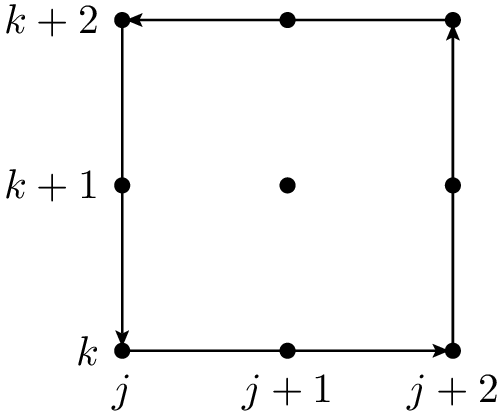

In [24]:
Image("./stencil2D3x3y.png", width=250)

In [25]:
laplace2 = Forest(Janet)
res = ginvMin((
(T(ux, j) + T(ux))/2*h - (T(u, j) - T(u)),\
(T(uy, k) + T(uy))/2*h - (T(u, k) - T(u)),\
-(T(uy, j) - T(uy, j, k, 2))*2*h +\
 (T(ux, j, 2, k) - T(ux, k))*2*h), \
laplace2, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {laplace2.count()}")
print(f"reduction: {laplace2.reduction()}")
print(f"       HP: {laplace2[-1].HP()}")

prolong uy*k
T(uy, k)
prolong ux*j
T(ux, j)
prolong ux*j**2*k
T(u, j, 2, k)
prolongAll
crit1: 0
crit2: 0
 time: 0.02 sec
    count: 3
reduction: 5
       HP: 3s


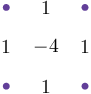

In [26]:
for w in laplace2[-1].GB():
    display(sum(Symbol(m.T_latex())*c for m, c in w.poly))
    
    frm, l = [pyx.text.halign.boxcenter, pyx.text.valign.middle], 1.
    pyx.unit.set(wscale=1)
    canvas = pyx.canvas.canvas()
    res = dict(((m[0], m[1]), c) for m, c in w.poly)
    X, Y = max(x for x, y in res), max(x for x, y in res)
    for x in range(X+1):
        for y in range(Y+1):
            if (x, y) in res:
                canvas.text(x*l, y*l, fr"\Large${res[x, y]}$", frm)
            else:
                canvas.fill(pyx.path.circle(x, y, l/12), [pyx.color.cmyk.RoyalPurple]) 
    display(canvas)

<https://en.wikipedia.org/wiki/Compact_finite_difference>

4-ой порядок центральная схема: 
$$\frac{1}{12}f''_{i-1} + \frac{5}{6}f''_{i} + \frac{1}{12}f''_{i+1} = \frac{f_{i+1}-2f_{i}+f_{i-1}}{h^2}.$$

Интегральная форма
$$- \int\limits_{0}^{1}\int f{\left(x \right)}\, dx\, dx + \int\limits_{1}^{2}\int f{\left(x \right)}\, dx\, dx = - \frac{f^{(4)} h^{6}}{240} + h^{2} \left(\frac{f{\left(x_{i} \right)}}{12} + \frac{5 f{\left(x_{i+1} \right)}}{6} + \frac{f{\left(x_{i+2} \right)}}{12}\right)$$


In [27]:
var = 'j, k'.split(', ')
fun = 'uxx, uyy, u'.split(', ')
var, fun = PolySchem.init(var, fun)
T = PolySchem.T
j, k = var
uxx, uyy, u = fun

In [28]:
laplace6 = Forest(Janet)
res = ginvMin((
(T(uxx, j, 2)/12 + 5*T(uxx, j)/6  + T(uxx)/12)*h**2\
    - (T(u, j, 2) - 2* T(u, j) + T(u)),\
(T(uyy, k, 2)/12 + 5*T(uyy, k)/6  + T(uyy)/12)*h**2\
    - (T(u, k, 2) - 2* T(u, k) + T(u)),\
T(uxx) + T(uyy)), \
laplace6, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {laplace6.count()}")
print(f"reduction: {laplace6.reduction()}")
print(f"       HP: {laplace6.HP()}")

prolong uyy*k**2
T(uyy, k, 2)
prolong uxx
T(uxx)
prolong uxx*j**2
T(uyy, j, 2)
prolongAll
T(uyy, j, k, 2)
prolongAll
T(u, j, 2, k, 2)
prolongAll
crit1: 0
crit2: 0
 time: 0.05 sec
    count: 5
reduction: 10
       HP: 4s + 2


In [29]:
for w in laplace6.GB():
    print(w.poly)

T(uxx) + T(uyy)
T(uyy, k, 2)*h**2 + T(uyy, k)*10*h**2 + T(uyy)*h**2 + T(u, k, 2)*-12 + T(u, k)*24 + T(u)*-12
T(uyy, j, 2)*-h**2 + T(uyy, j)*-10*h**2 + T(uyy)*-h**2 + T(u, j, 2)*-12 + T(u, j)*24 + T(u)*-12
T(u, j, 2, k, 2) + T(u, j, 2, k)*4 + T(u, j, 2) + T(u, j, k, 2)*4 + T(u, j, k)*-20 + T(u, j)*4 + T(u, k, 2) + T(u, k)*4 + T(u)


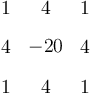

In [30]:
for w in laplace6[-1].GB():
    p = sum(Symbol(m.T_latex())*c for m, c in w.poly).expand()
    display(ratsimp(p.coeff(h, 0)))
    
    frm, l = [pyx.text.halign.boxcenter, pyx.text.valign.middle], 1.
    pyx.unit.set(wscale=1)
    canvas = pyx.canvas.canvas()
    res = dict(((m[0], m[1]), c) for m, c in w.poly)
    X, Y = max(x for x, y in res), max(x for x, y in res)
    for x in range(X+1):
        for y in range(Y+1):
            if (x, y) in res:
                canvas.text(x*l, y*l, fr"\Large${res[x, y]}$", frm)
            else:
                canvas.fill(pyx.path.circle(x, y, l/12), [pyx.color.cmyk.RoyalPurple]) 
    display(canvas)

In [31]:
var = 'j, k'.split(', ')
fun = 'uxx, uyy, u, f'.split(', ')
var, fun = PolySchem.init(var, fun)
T = PolySchem.T
j, k = var
uxx, uyy, u, f = fun

In [32]:
poisson4 = Forest(Janet)
res = ginvMin((
(T(uxx, j, 2)/12 + 5*T(uxx, j)/6  + T(uxx)/12)*h**2\
    - (T(u, j, 2) - 2* T(u, j) + T(u)),\
(T(uyy, k, 2)/12 + 5*T(uyy, k)/6  + T(uyy)/12)*h**2\
    - (T(u, k, 2) - 2* T(u, k) + T(u)),\
T(uxx) + T(uyy) - T(f)), \
poisson4, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {poisson4.count()}")
print(f"reduction: {poisson4.reduction()}")
print(f"       HP: {poisson4.HP()}")

prolong uyy*k**2
T(uyy, k, 2)
prolong uxx
T(uxx)
prolong uxx*j**2
T(uyy, j, 2)
prolongAll
T(uyy, j, k, 2)
prolongAll
T(u, j, 2, k, 2)
prolongAll
crit1: 0
crit2: 0
 time: 0.03 sec
    count: 5
reduction: 10
       HP: s^2/2 + 11s/2 + 3


In [33]:
for w in poisson4.GB():
    print(w.poly)

T(uxx) + T(uyy) + T(f)*-1
T(uyy, k, 2)*h**2 + T(uyy, k)*10*h**2 + T(uyy)*h**2 + T(u, k, 2)*-12 + T(u, k)*24 + T(u)*-12
T(uyy, j, 2)*-h**2 + T(uyy, j)*-10*h**2 + T(uyy)*-h**2 + T(u, j, 2)*-12 + T(u, j)*24 + T(u)*-12 + T(f, j, 2)*h**2 + T(f, j)*10*h**2 + T(f)*h**2
T(u, j, 2, k, 2)*24 + T(u, j, 2, k)*96 + T(u, j, 2)*24 + T(u, j, k, 2)*96 + T(u, j, k)*-480 + T(u, j)*96 + T(u, k, 2)*24 + T(u, k)*96 + T(u)*24 + T(f, j, 2, k, 2)*-h**2 + T(f, j, 2, k)*-10*h**2 + T(f, j, 2)*-h**2 + T(f, j, k, 2)*-10*h**2 + T(f, j, k)*-100*h**2 + T(f, j)*-10*h**2 + T(f, k, 2)*-h**2 + T(f, k)*-10*h**2 + T(f)*-h**2


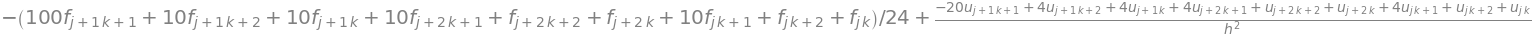

- \frac{100 {f}_{{j} + 1\, {k} + 1} + 10 {f}_{{j} + 1\, {k} + 2} + 10 {f}_{{j} + 1\, {k}} + 10 {f}_{{j} + 2\, {k} + 1} + {f}_{{j} + 2\, {k} + 2} + {f}_{{j} + 2\, {k}} + 10 {f}_{{j}\, {k} + 1} + {f}_{{j}\, {k} + 2} + {f}_{{j}\, {k}}}{24} + \frac{- 20 {u}_{{j} + 1\, {k} + 1} + 4 {u}_{{j} + 1\, {k} + 2} + 4 {u}_{{j} + 1\, {k}} + 4 {u}_{{j} + 2\, {k} + 1} + {u}_{{j} + 2\, {k} + 2} + {u}_{{j} + 2\, {k}} + 4 {u}_{{j}\, {k} + 1} + {u}_{{j}\, {k} + 2} + {u}_{{j}\, {k}}}{h^{2}}


In [34]:
for w in poisson4[-2].GB():
    p = sum(Symbol(m.T_latex())*c for m, c in w.poly).expand()/24
    display(ratsimp(p.coeff(h, 2)).factor() +
            ratsimp(p.coeff(h, 0)/h**2))
    print(sympy.latex(ratsimp(p.coeff(h, 2)).factor() +
            ratsimp(p.coeff(h, 0)/h**2)))

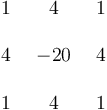

In [35]:
for w in poisson4[-2].GB():
    frm, l = [pyx.text.halign.boxcenter, pyx.text.valign.middle], 1.2
    pyx.unit.set(wscale=1)
    canvas = pyx.canvas.canvas()
    res = dict(((m[0], m[1]), c/24) for m, c in w.poly if m.position() == 2)
    X, Y = max(x for x, y in res), max(x for x, y in res)
    for x in range(X+1):
        for y in range(Y+1):
            if (x, y) in res:
                canvas.text(x*l, y*l, fr"\Large${res[x, y]}$", frm)
            else:
                canvas.fill(pyx.path.circle(x, y, l/12), [pyx.color.cmyk.RoyalPurple]) 
    display(canvas)
    canvas.writePDFfile("./p1.pdf")  

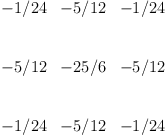

In [36]:
for w in poisson4[-2].GB():
    frm, l = [pyx.text.halign.boxcenter, pyx.text.valign.middle], 1.5
    pyx.unit.set(wscale=1)
    canvas = pyx.canvas.canvas()
    res = dict(((m[0], m[1]), ratsimp(c.coeff(h, 2)/24)) for m, c in w.poly if m.position() == 3)
    X, Y = max(x for x, y in res), max(x for x, y in res)
    for x in range(X+1):
        for y in range(Y+1):
            if (x, y) in res:
                canvas.text(x*l, y*l, fr"\large${res[x, y]}$", frm)
            else:
                canvas.fill(pyx.path.circle(x, y, l/12), [pyx.color.cmyk.RoyalPurple]) 
    display(canvas)
    canvas.writePDFfile("./p2.pdf") 

Мы будем рассматривать применение описанного выше метода дискретизации к квазилинейным эволюционным уравнениям вида
\begin{equation}
u_t=a\,u_m+F(u_{m-1},\ldots,u_1,u)\,
\end{equation}
где $0\neq a$ 
$$
m\in N_{>0},\ u_k:=\partial_x^ku,\ (0\leq k\leq m),\ u_0:=u, 
$$
а $F$ - дифференциальный многочлен $m-1$ in $\partial_x$ . Если существует дифференциальный многочлентакой, что $F=\partial_x P$, тогда уравнение допускает представление в форме дифференциального закона сохранения
$$
u_t=\partial_x\left(a\,u_{m-1}+P\right).
$$

Будем рассматривать только одиночные уравнения, поэтому пропустим шаг приведения в инволюцию и перейдем непосредственно к шагу 3. Как было описано ранее, при определённых условиях квазилинейное эволюционное уравнение допускает дифференциальную форму закона сохранения. На основе этого можно привести уравнение в соответствующую интегральную форму закона сохранения
$$
\oint _{\Gamma} (P + au _{m-1})\, dt + u \, dx=0\,
$$
где $\Gamma$ произвольный контур интегрирования, ограничивающий односвязную область.  Выберем следующий прямоугольный контур интегрирования в качестве контрольного объёма
<img src="./stencil2D3t2x.png" width="250">
Для дискретизации контурного интеграла и вычисления его значений воспользуемся сеточными функциями $u_{j}^{n}: =u (t_{n} ,x_{j} )$. В силу того, что исходное уравнение принадлежит к классу эволюционных вида, в нём содержится только одна производная по времени, причём, первого порядка, и при переводе уравнения в интегральную форму она благополучно исчезает. Поэтому теперь необходимо добавить точные интегральные соотношения для частных производных только по пространственной переменной
$$
	\int _{x_{j}}^{x_{j+1} } u_{k} \,dx=u_{k+1}(t,x_{j+1} )-u_{k+1}(t,x_{j} ),
$$
где ${k}=1, \dots, {m-2}$, и аппроксимировать их численно на сетке. В результате получим систему разностных уравнений, которая включает сеточные функции искомой функции и её частных производных по пространственной переменной
$$
u_{j}^{n},{u_1}_{j}^{n},\ldots,{u_{m-1}}_{j}^{n}.
$$
Исключение частных производных из системы приводит к искомой конечно-разностной аппроксимации.

In [37]:
var = 'n, j'.split(', ')
fun = 'uxx, ux, ut, u, P'.split(', ')
T = PolySchem.T
var, fun = PolySchem.init(var, fun)
n, j = var
uxx, ux, ut, u, P = fun

$$
\oint _{\Gamma} (P + u_{xx})\, dt + u \, dx=0\,
$$
\begin{equation}\label{discrete}
\begin{gathered}
((P^n_{j+2}+P^{n+1}_{j+2})/2 - (P^n_j+P^{n+1}_j)/2)\,\tau + {}\\
(({u_{xx}}^n_{j+2}+{u_{xx}}^{n+1}_{j+2})/2 - ({u_{xx}}^n_j+{u_{xx}}^{n+1}_j)/2)\,\tau + {}\\
(2u^n_{j+1} - 2u^{n+1}_{j+1})\,h=0.
\end{gathered}
\end{equation}
<img src="./stencil2D3t2x.png" width="250">

In [38]:
Monom.cmp = Monom.POTlex
KDV = Forest(Janet)
res = ginvMin((\
((T(P, j, 2) + T(P, n, j, 2))/2 - (T(P) + T(P, n))/2)*tau +\
((T(uxx, j, 2) + T(uxx, n, j, 2))/2 - (T(uxx) + T(uxx, n))/2)*tau +\
(2*T(u, j) - 2*T(u, n, j))*h,\
(T(ux, j) + T(ux))/2*h - (T(u, j) - T(u)),\
T(uxx, j)*2*h - (T(ux, j, 2) - T(ux)),\
), KDV, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {KDV.count()}")
print(f"reduction: {KDV.reduction()}")
print(f"       HP: {KDV[-2].HP()}")

prolong ux*j
T(ux, j)
prolong uxx*j
T(uxx, j)
prolong uxx*n*j**2
T(uxx, n)
prolongAll
T(u, n, j, 4)
prolongAll
crit1: 0
crit2: 0
 time: 0.04 sec
    count: 4
reduction: 8
       HP: 5s - 5


In [39]:
for w in KDV[-2].GB():
    print(w.poly)

T(u, n, j, 4)*-tau + T(u, n, j, 3)*2*tau + T(u, n, j, 2)*4*h**3 + T(u, n, j)*-2*tau + T(u, n)*tau + T(u, j, 4)*-tau + T(u, j, 3)*2*tau + T(u, j, 2)*-4*h**3 + T(u, j)*-2*tau + T(u)*tau + T(P, n, j, 3)*-h**2*tau + T(P, n, j)*h**2*tau + T(P, j, 3)*-h**2*tau + T(P, j)*h**2*tau


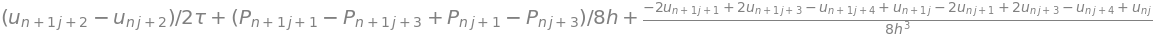

In [40]:
for w in KDV[-2].GB():
    p = sum(Symbol(m.T_latex())*c for m, c in w.poly).expand()
    display(ratsimp(p.coeff(tau, 0).coeff(h, 3)/(8*tau)) +
            ratsimp(p.coeff(tau, 1).coeff(h, 2)/(8*h)) +
            ratsimp(p.coeff(tau, 1).coeff(h, 0)/(8*h**3)))

Компактные разностные операторы в дифференциальной форме
$$\frac{1}{6}f'_{i+1} + \frac{2}{3}f'_{i} + \frac{1}{6}f'_{i-1} = \frac{f_{i+1}-f_{i-1}}{2h}$$
$$\frac{1}{12}f''_{i+1} + \frac{5}{6}f''_{i} + \frac{1}{12}f''_{i-1} = \frac{f_{i+1}-2f_{i}+f_{i-1}}{h^2}$$

Учитывая само уравнение (Nayfeh A. H. Introduction to Perturbation Techniques, Wiley-VCH, 1st edition, 1993. 536 p.)
$$\varepsilon f''_{i} + \left(1 + \varepsilon^{2}\right)f'_{i} + \left(1 - \varepsilon^{2}\right)f_{i}=0$$

In [41]:
var = 'j'.split(', ')
fun = 'fxx, fx, f'.split(', ')
T = PolySchem.T
var, fun = PolySchem.init(var, fun)
j = var[0]
fxx, fx, f = fun

In [42]:
eps, h = symbols(r'\varepsilon,  h', real=True)
eps0 = sympy.Symbol(r'(1 + {\varepsilon^2})', real=True)
eps1 = sympy.Symbol(r'(1 - {\varepsilon^2})', real=True)
eps, eps0, eps1, h

In [43]:
BL = Forest(Janet)
res = ginvMin((\
(T(fx, j, 2)/6 + 2*T(fx, j)/3 + T(fx)/6) - (T(f, j, 2) - T(f))/(2*h),\
(T(fxx, j, 2)/12 + 5*T(fxx, j)/6 + T(fxx)/12) - (T(f, j, 2) - 2*T(f, j) + T(f))/h**2,\
eps*T(fxx) + eps0*T(fx) + eps1*T(f),\
), BL, level=2)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {BL.count()}")
print(f"reduction: {BL.reduction()}")
print(f"       HP: {BL.HP()}")

prolong fx*j**2
T(fx, j, 2)
prolong fxx
T(fxx)
prolong fxx*j**2
T(fx, j)
prolong fx*j**2
T(fx)
prolong fx*j
T(f, j, 4)
prolongAll
crit1: 0
crit2: 0
 time: 0.13 sec
    count: 3
reduction: 11
       HP: 4


\frac{(1 + {\varepsilon^2}) \left(- 3 {f}_{{j} + 1} + 30 {f}_{{j} + 2} + 3 {f}_{{j} + 3} - 30 {f}_{{j}}\right)}{h} + (1 - {\varepsilon^2}) \left(41 {f}_{{j} + 1} + 14 {f}_{{j} + 2} + {f}_{{j} + 3} + 10 {f}_{{j}}\right) + 6 \varepsilon {fxx}_{{j}} + \frac{\varepsilon \left(- 84 {f}_{{j} + 1} + 24 {f}_{{j} + 2} + 12 {f}_{{j} + 3} + 48 {f}_{{j}}\right)}{h^{2}}


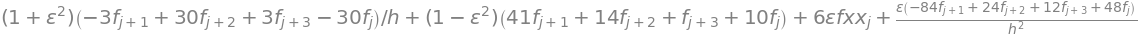

6 (1 + {\varepsilon^2}) {fx}_{{j}} + \frac{(1 + {\varepsilon^2}) \left(3 {f}_{{j} + 1} - 30 {f}_{{j} + 2} - 3 {f}_{{j} + 3} + 30 {f}_{{j}}\right)}{h} + (1 - {\varepsilon^2}) \left(- 41 {f}_{{j} + 1} - 14 {f}_{{j} + 2} - {f}_{{j} + 3} - 4 {f}_{{j}}\right) + \frac{\varepsilon \left(84 {f}_{{j} + 1} - 24 {f}_{{j} + 2} - 12 {f}_{{j} + 3} - 48 {f}_{{j}}\right)}{h^{2}}


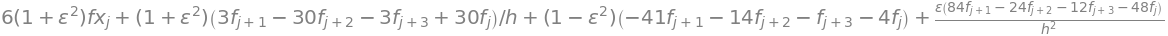

\frac{(1 + {\varepsilon^2}) \left(30 {f}_{{j} + 1} - 30 {f}_{{j} + 3} - 3 {f}_{{j} + 4} + 3 {f}_{{j}}\right)}{h} + (1 - {\varepsilon^2}) \left(- 14 {f}_{{j} + 1} - 42 {f}_{{j} + 2} - 14 {f}_{{j} + 3} - {f}_{{j} + 4} - {f}_{{j}}\right) + \frac{\varepsilon \left(- 24 {f}_{{j} + 1} + 72 {f}_{{j} + 2} - 24 {f}_{{j} + 3} - 12 {f}_{{j} + 4} - 12 {f}_{{j}}\right)}{h^{2}}


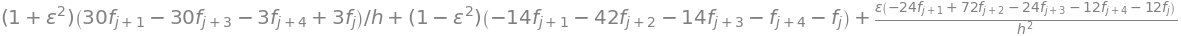

In [44]:
for w in BL.GB():
    p = sum(Symbol(m.T_latex())*c for m, c in w.poly).expand()
    print(sympy.latex(sum(ratsimp(p.coeff(h, i)/(h**(2-i))).collect([eps, eps0, eps1]) for i in range(3))))
    display(sum(ratsimp(p.coeff(h, i)/(h**(2-i))).collect([eps, eps0, eps1]) for i in range(3)))

T(fx, j)*-6*(1 + {\varepsilon^2})*h**2 + T(f, j, 4)*3*(1 + {\varepsilon^2})*h + (1 - {\varepsilon^2})*h**2 + 12*\varepsilon + T(f, j, 3)*30*(1 + {\varepsilon^2})*h + 14*(1 - {\varepsilon^2})*h**2 + 24*\varepsilon + T(f, j, 2)*-3*(1 + {\varepsilon^2})*h + 41*(1 - {\varepsilon^2})*h**2 - 84*\varepsilon + T(f, j)*-30*(1 + {\varepsilon^2})*h + 4*(1 - {\varepsilon^2})*h**2 + 48*\varepsilon
6 (1 + {\varepsilon^2}) {fx}_{{j} + 1} + \frac{(1 + {\varepsilon^2}) \left(3 {f}_{{j} + 2} - 3 {f}_{{j}}\right)}{h} + (1 - {\varepsilon^2}) \left(10 {f}_{{j} + 1} + {f}_{{j} + 2} + {f}_{{j}}\right) + \frac{\varepsilon \left(- 24 {f}_{{j} + 1} + 12 {f}_{{j} + 2} + 12 {f}_{{j}}\right)}{h^{2}}


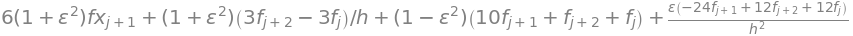

In [45]:
for w in BL[1].GB():
    p = -w.poly.prolong(0)
    print(p)
    p.NFtail(BL)
    p.pp()
    p = sum(Symbol(m.T_latex())*c for m, c in p).expand()
    print(sympy.latex(sum(ratsimp(p.coeff(h, i)/(h**(2-i))).collect([eps, eps0, eps1]) for i in range(3))))
    display(sum(ratsimp(p.coeff(h, i)/(h**(2-i))).collect([eps, eps0, eps1]) for i in range(3)))

T(fx, j, 3)*6*(1 + {\varepsilon^2})*h**2 + T(f, j, 6)*-3*(1 + {\varepsilon^2})*h - (1 - {\varepsilon^2})*h**2 - 12*\varepsilon + T(f, j, 5)*-30*(1 + {\varepsilon^2})*h - 14*(1 - {\varepsilon^2})*h**2 - 24*\varepsilon + T(f, j, 4)*3*(1 + {\varepsilon^2})*h - 41*(1 - {\varepsilon^2})*h**2 + 84*\varepsilon + T(f, j, 3)*30*(1 + {\varepsilon^2})*h - 4*(1 - {\varepsilon^2})*h**2 - 48*\varepsilon
6 (1 + {\varepsilon^2}) {fx}_{{j} + 3} + \frac{(1 + {\varepsilon^2}) \left(30 {f}_{{j} + 1} - 3 {f}_{{j} + 2} - 30 {f}_{{j} + 3} + 3 {f}_{{j}}\right)}{h} + (1 - {\varepsilon^2}) \left(- 14 {f}_{{j} + 1} - 41 {f}_{{j} + 2} - 4 {f}_{{j} + 3} - {f}_{{j}}\right) + \frac{\varepsilon \left(- 24 {f}_{{j} + 1} + 84 {f}_{{j} + 2} - 48 {f}_{{j} + 3} - 12 {f}_{{j}}\right)}{h^{2}}


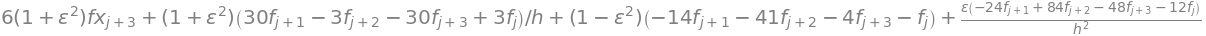

In [46]:
for w in BL[1].GB():
    p = w.poly.prolong(0).prolong(0).prolong(0)
    print(p)
    p.NFtail(BL)
    p.pp()
    p = sum(Symbol(m.T_latex())*c for m, c in p).expand()
    print(sympy.latex(sum(ratsimp(p.coeff(h, i)/(h**(2-i))).collect([eps, eps0, eps1]) for i in range(3))))
    display(sum(ratsimp(p.coeff(h, i)/(h**(2-i))).collect([eps, eps0, eps1]) for i in range(3)))

T(f, j, 5)*-3*(1 + {\varepsilon^2})*h - (1 - {\varepsilon^2})*h**2 - 12*\varepsilon + T(f, j, 4)*-30*(1 + {\varepsilon^2})*h - 14*(1 - {\varepsilon^2})*h**2 - 24*\varepsilon + T(f, j, 3)*-42*(1 - {\varepsilon^2})*h**2 + 72*\varepsilon + T(f, j, 2)*30*(1 + {\varepsilon^2})*h - 14*(1 - {\varepsilon^2})*h**2 - 24*\varepsilon + T(f, j)*3*(1 + {\varepsilon^2})*h - (1 - {\varepsilon^2})*h**2 - 12*\varepsilon
\left((1 + {\varepsilon^2})\right)^{2} \cdot \left(891 {f}_{{j} + 1} - 90 {f}_{{j} + 2} - 900 {f}_{{j} + 3} + 9 {f}_{{j} + 5} + 90 {f}_{{j}}\right) + \frac{\varepsilon^{2} \left(- 432 {f}_{{j} + 1} + 2016 {f}_{{j} + 2} - 1440 {f}_{{j} + 3} + 144 {f}_{{j} + 5} - 288 {f}_{{j}}\right)}{h^{2}} + \varepsilon \left(- 648 (1 - {\varepsilon^2}) {f}_{{j} + 1} + 192 (1 - {\varepsilon^2}) {f}_{{j} + 2} - 240 (1 - {\varepsilon^2}) {f}_{{j} + 3} + 24 (1 - {\varepsilon^2}) {f}_{{j} + 5} - 192 (1 - {\varepsilon^2}) {f}_{{j}}\right) + \frac{\varepsilon \left(1872 (1 + {\varepsilon^2}) {f}_{{j} + 2} - 16

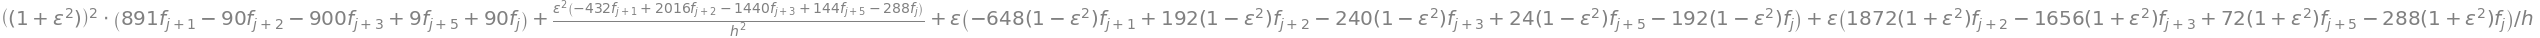

In [47]:
for w in BL[2].GB():
    p = w.poly.prolong(0)
    print(p)
    p.NFtail(BL)
    p.pp()
    p = sum(Symbol(m.T_latex())*c for m, c in p).expand()
    print(sympy.latex(sum(ratsimp(p.coeff(h, i)/(h**(2-i))).collect([eps, eps0, eps1]) for i in range(3))))
    display(sum(ratsimp(p.coeff(h, i)/(h**(2-i))).collect([eps, eps0, eps1]) for i in range(3)))